## **Análisis Descriptivo**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

**Cargar el conjunto de datos**

In [4]:
df_2012_2023 = pd.read_csv('../data/processed/mex_trade_2012_2023_clean.csv')
df_2012_2023.head()

,prod_est,coverage,type,year,month,concept,value_usd,status
0,Trade Balance of Goods of Mexico,National,Exports,2012,1,Total Exports,"27,281.58",Final Figures
1,Trade Balance of Goods of Mexico,National,Exports,2012,1,Petroleum,"4,628.30",Final Figures
2,Trade Balance of Goods of Mexico,National,Exports,2012,1,Crude Oil,"4,008.11",Final Figures
3,Trade Balance of Goods of Mexico,National,Exports,2012,1,Other Oil,620.18,Final Figures
4,Trade Balance of Goods of Mexico,National,Exports,2012,1,Non Petroleum,"22,653.28",Final Figures


**Volumne total de exportaciones e importaciones por año.**

In [5]:
expor_import_2012_2023 = df_2012_2023.groupby(['year','type'])['value_usd'].sum()
expor_import_2012_2023

year  type          
2012  Exports          1,112,309.67
      Imports          1,502,457.46
      Not applicable      -9,688.95
2013  Exports          1,140,045.15
      Imports          1,544,351.16
      Not applicable     -12,145.48
2014  Exports          1,190,740.90
      Imports          1,623,145.84
      Not applicable     -17,745.65
2015  Exports          1,141,668.26
      Imports          1,601,116.96
      Not applicable     -39,446.30
2016  Exports          1,121,860.84
      Imports          1,569,246.66
      Not applicable     -36,716.10
2017  Exports          1,228,297.72
      Imports          1,705,150.95
      Not applicable     -33,710.33
2018  Exports          1,352,138.18
      Imports          1,882,275.57
      Not applicable     -39,712.33
2019  Exports          1,381,811.63
      Imports          1,844,718.77
      Not applicable      -1,151.63
2020  Exports          1,251,512.20
      Imports          1,552,528.28
      Not applicable      58,077.33
2021  E

In [6]:
# Convertir la Serie a DataFrame para facilitar su uso
df_expor_import_2012_2023 = expor_import_2012_2023.reset_index()

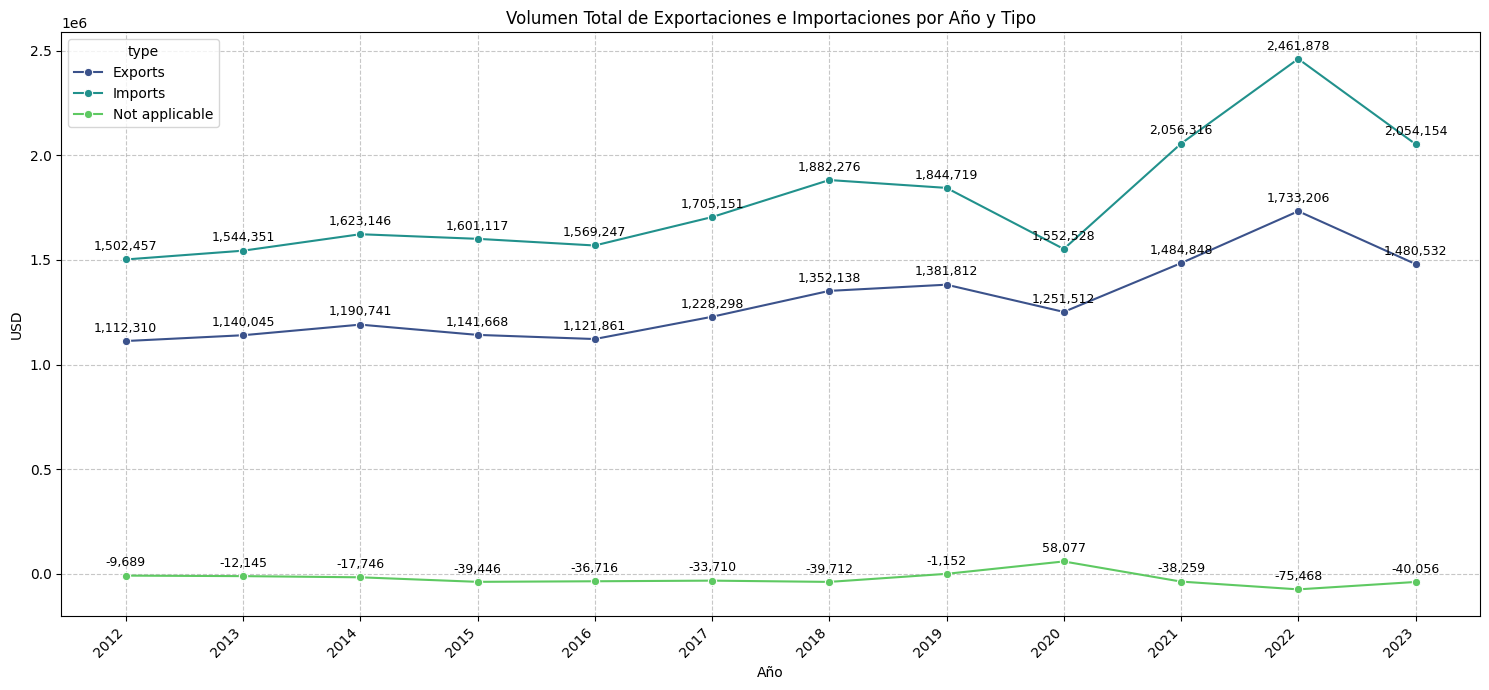

In [17]:
plt.figure(figsize=(15,7))
sns.lineplot(x='year', y='value_usd', hue='type', data=df_expor_import_2012_2023, marker='o', palette='viridis' )

for transaction_type in df_expor_import_2012_2023['type'].unique():
    subset_df = df_expor_import_2012_2023[df_expor_import_2012_2023['type'] == transaction_type]  
    for index, row in subset_df.iterrows():
        x_pos = row['year']
        y_pos = row['value_usd']
        text_value = '{:,.0f}'.format(y_pos) 
        y_offset = 30000
    
        plt.text(
            x_pos, 
            y_pos + y_offset, 
            text_value,
            ha='center',      
            va='bottom',      
            fontsize=9,       
            color='black'     
            # fontweight='bold'
        )

plt.title('Volumen Total de Exportaciones e Importaciones por Año y Tipo')
plt.xlabel('Año')
plt.ylabel('USD')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_expor_import_2012_2023['year'].unique(),rotation=45, ha='right') 
plt.tight_layout()
plt.show()